In [1]:
# importa bibliotecas
import pandas as pd
from datetime import datetime, timedelta
import shutil
import os
from datetime import datetime
import calendar
import gzip
import shutil
import glob
import time
import ultraplot as uplt



### organizando o dataset


In [2]:
df = glob.glob(os.path.join('2019/pulse_CLIMATE_*.txt.gz'))
df

['2019\\pulse_CLIMATE_2019-01-01.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-02.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-03.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-04.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-05.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-06.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-07.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-08.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-09.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-10.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-11.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-12.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-13.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-14.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-15.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-16.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-17.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-18.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-19.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-20.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-21.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-22.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-23.txt.gz',
 '2019\\pulse_CLIMATE_2019-01-24.t

In [3]:
lat_min, lat_max = -23.0, -14.0  # Latitude
lon_min, lon_max = -52.0, -39.0  # Longitude

df = glob.glob(os.path.join('2019/pulse_CLIMATE_*.txt.gz'))

df_mg = df[(df['Lat'] >= lat_min) & (df['Lat'] <= lat_max) & (df['Lon'] >= lon_min) & (df['Lon'] <= lon_max)]

list_df = []

for filename in df_mg:

    df_temp = pd.read_csv(filename, sep='  ' , header=None, skiprows=1, engine='python', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11])

    df_temp.rename(columns={1: 'tipo', 2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute', 7: 'second', 8: 'Lat', 9: 'Lon', 11: 'PC(A)'}, inplace=True)

    df_temp['Data'] = pd.to_datetime(df_temp[['year', 'month', 'day', 'hour', 'minute', 'second']])
    df_temp.index = pd.to_datetime(df_temp['Data'])
    df_temp.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second','Data'], inplace=True)


    list_df.append(df_temp)
df = pd.concat(list_df, ignore_index=True)

TypeError: list indices must be integers or slices, not str

In [39]:

# limites de MG
lonmin_MG, lonmax_MG = -52., -39.
latmin_MG, latmax_MG = -23., -14.

dir =  '2019/'

df = pd.read_csv(f'{dir}/pulse_CLIMATE_2019-01-01.txt.gz', sep='  ' , header=None, skiprows=1, engine='python', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11])

df.rename(columns={1: 'tipo', 2: 'year', 3: 'month', 4: 'day', 5: 'hour', 6: 'minute', 7: 'second', 8: 'Lat', 9: 'Lon', 11: 'PC'}, inplace=True)

df['Data'] = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute', 'second']])
df.index = pd.to_datetime(df['Data'])
df.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second','Data'], inplace=True)

df = df[ (df['Lon'] > lonmin_MG) & (df['Lon'] < lonmax_MG) &
                    (df['Lat'] > latmin_MG)  & (df['Lat'] < latmax_MG)]

df


,tipo,Lat,Lon,PC
Data,,,,
2019-01-01 23:59:58,CG,-16.9729,-45.0124,-15225.0
2019-01-01 23:59:58,IC,-16.9980,-44.8518,-4877.0
2019-01-01 23:59:58,IC,-16.9525,-44.9684,5808.0
2019-01-01 23:59:57,IC,-16.9763,-45.0803,-7794.0
2019-01-01 23:59:48,CG,-16.6591,-45.0150,-30965.0
...,...,...,...,...
2019-01-01 00:00:13,CG,-18.1290,-51.3905,-29525.0
2019-01-01 00:00:12,CG,-18.1051,-51.3862,-32587.0
2019-01-01 00:00:12,IC,-18.0910,-51.3875,-8885.0


In [5]:
%%time

# limites de MG
lonmin_MG, lonmax_MG = -52., -39.
latmin_MG, latmax_MG = -23., -14.



# tamanho do chunks
chunks = []  # lista para acumular os DataFrames filtrados
chunksize = 500_000 # 500mil linhas

# loop nos pedaços
for chunk in pd.read_csv('2019/pulse_CLIMATE_2019-01-01.txt.gz', sep='  ' , header=None, skiprows=1, engine='python', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11],
                         chunksize=chunksize):

    print(chunk.shape)

    # filtra para a região de estudo
    filtrado = chunk[ (chunk['longitude'] > lonmin_MG) & (chunk['longitude'] < lonmax_MG) &
                      (chunk['latitude'] > latmin_MG)  & (chunk['latitude'] < latmax_MG)]

    chunks.append(filtrado)

# concatena todos os pedaços filtrados
df_tot = pd.concat(chunks, ignore_index=True)

# mostra o dado
df_tot

(500000, 10)


KeyError: 'longitude'

In [40]:


# 1. Definir os limites geográficos
lat_min, lat_max = -23.0, -14.0  # Latitude para MG
lon_min, lon_max = -52.0, -39.0  # Longitude para MG

# 2. Obter a lista de todos os nomes de arquivo usando glob
#    (Renomeado para 'lista_arquivos' para maior clareza)
caminho_dos_dados = '2019/'
lista_arquivos = glob.glob(os.path.join(caminho_dos_dados, 'pulse_CLIMATE_*.txt.gz'))

# 3. Criar uma lista vazia para guardar os DataFrames já filtrados
lista_dfs_filtrados = []

print(f"Encontrados {len(lista_arquivos)} arquivos para processar.")

# 4. Loop através da lista de nomes de arquivos
for filename in lista_arquivos:
    print(f"Processando: {filename}")
    try:
        # Ler um único arquivo para um DataFrame temporário
        df_temp = pd.read_csv(
            filename,
            sep='  ', 
            header=None,
            skiprows=1,
            engine='python',
            usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 11]
        )
        
        df_temp.rename(columns={
            1: 'tipo', 2: 'year', 3: 'month', 4: 'day', 
            5: 'hour', 6: 'minute', 7: 'second', 
            8: 'lat', 9: 'lon', 11: 'pc'
        }, inplace=True)

        # 5. APLICAR O FILTRO GEOGRÁFICO AQUI (depois de ler o arquivo)
        df_filtrado = df_temp[
            (df_temp['lat'] >= lat_min) & (df_temp['lat'] <= lat_max) &
            (df_temp['lon'] >= lon_min) & (df_temp['lon'] <= lon_max)
        ].copy() # Usar .copy() para evitar SettingWithCopyWarning

        # 6. Prosseguir com o processamento apenas se houver dados após o filtro
        if not df_filtrado.empty:
            df_filtrado['data'] = pd.to_datetime(df_filtrado[['year', 'month', 'day', 'hour', 'minute', 'second']])
            df_filtrado.set_index('data', inplace=True)
            df_filtrado.drop(columns=['year', 'month', 'day', 'hour', 'minute', 'second'], inplace=True)
            
            # Adicionar o DataFrame processado e filtrado à lista
            lista_dfs_filtrados.append(df_filtrado)
        else:
            print(f"  -> Nenhum dado encontrado para MG em {filename}")

    except Exception as e:
        print(f"  -> Erro ao ler ou processar o arquivo {filename}: {e}")

# 7. Concatenar todos os DataFrames da lista em um único DataFrame final
if lista_dfs_filtrados:
    df_final = pd.concat(lista_dfs_filtrados) # Não usar ignore_index para manter o DatetimeIndex
    print("\n✅ Processamento concluído com sucesso!")
    print("Informações do DataFrame final:")
    df_final.info()
    print("\nAmostra dos dados:")
    print(df_final.head())
else:
    print("\nNenhum dado encontrado para a região de MG em todos os arquivos processados.")
    
df_final.to_csv('2019/dados_filtrados_MG.csv', index=True)

Encontrados 320 arquivos para processar.
Processando: 2019\pulse_CLIMATE_2019-01-01.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-02.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-03.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-04.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-05.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-06.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-07.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-08.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-09.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-10.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-11.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-12.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-13.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-14.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-15.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-16.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-17.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-18.txt.gz
Processando: 2019\pulse_CLIMATE_2019-01-19.txt.gz
Processan

### executa apartir daki


In [2]:
df = pd.read_csv('2019/dados_filtrados_MG.csv', index_col=0, parse_dates=True)
df

C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\589678619.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2019/dados_filtrados_MG.csv', index_col=0, parse_dates=True)


,tipo,lat,lon,pc
data,,,,
2019-01-01 23:59:58,CG,-16.9729,-45.0124,-15225.0
2019-01-01 23:59:58,IC,-16.9980,-44.8518,-4877.0
2019-01-01 23:59:58,IC,-16.9525,-44.9684,5808.0
2019-01-01 23:59:57,IC,-16.9763,-45.0803,-7794.0
2019-01-01 23:59:48,CG,-16.6591,-45.0150,-30965.0
...,...,...,...,...
2019-11-15 00:00:01,IC,-21.8959,-47.0540,-4637.0
2019-11-15 00:00:01,CG,-21.8943,-47.0551,-8297.0
2019-11-15 00:00:01,CG,-22.1885,-46.8373,-11214.0


In [3]:
df['pc'] = pd.to_numeric(df['pc'], errors='coerce')

df.dropna(subset=['pc'], inplace=True)
df.dropna(subset=['lat'], inplace=True)
df.dropna(subset=['lon'], inplace=True)
df.dropna(subset=['tipo'], inplace=True)

df['pc'] = df['pc'].astype(int)


SAO VALORES EM K(A)

In [4]:
df['pc'] = df['pc']/1000 ############# VALORES EM K(A)
df

,tipo,lat,lon,pc
data,,,,
2019-01-01 23:59:58,CG,-16.9729,-45.0124,-15.225
2019-01-01 23:59:58,IC,-16.9980,-44.8518,-4.877
2019-01-01 23:59:58,IC,-16.9525,-44.9684,5.808
2019-01-01 23:59:57,IC,-16.9763,-45.0803,-7.794
2019-01-01 23:59:48,CG,-16.6591,-45.0150,-30.965
...,...,...,...,...
2019-11-15 00:00:01,IC,-21.8959,-47.0540,-4.637
2019-11-15 00:00:01,CG,-21.8943,-47.0551,-8.297
2019-11-15 00:00:01,CG,-22.1885,-46.8373,-11.214


In [5]:
df[df['tipo'] == 'CG' ]

,tipo,lat,lon,pc
data,,,,
2019-01-01 23:59:58,CG,-16.9729,-45.0124,-15.225
2019-01-01 23:59:48,CG,-16.6591,-45.0150,-30.965
2019-01-01 23:57:38,CG,-18.3408,-43.8419,39.426
2019-01-01 23:57:38,CG,-18.3281,-43.8479,-15.524
2019-01-01 23:57:33,CG,-16.5473,-45.0883,-6.109
...,...,...,...,...
2019-11-15 00:00:01,CG,-22.1149,-46.8811,-7.572
2019-11-15 00:00:01,CG,-21.8995,-47.0566,-5.156
2019-11-15 00:00:01,CG,-21.8995,-47.0524,-5.221


In [6]:
df_neg = df[df['pc'] < 0]
df_pos = df[df['pc'] >= 0]

### PLOT de figuras


In [7]:
df_mensal = df.groupby([df.index.month]).count()
df_mensal = df_mensal[['pc']].rename(columns={'pc': 'contagem'})


In [8]:
df_mensal

,contagem
data,
1,2133320
2,2455821
3,1789976
4,555246
5,299554
6,43468
7,4982
8,79384
9,316439


C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\505332681.py:8: UltraPlotWarning: The rc setting 'small' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.smallsize' instead.
  ax.format(xlabel='Mês',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\505332681.py:8: UltraPlotWarning: The rc setting 'large' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.largesize' instead.
  ax.format(xlabel='Mês',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\505332681.py:8: UltraPlotWarning: The rc setting 'small' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.smallsize' instead.
  ax.format(xlabel='Mês',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\505332681.py:8: UltraPlotWarning: The rc setting 'large' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please 

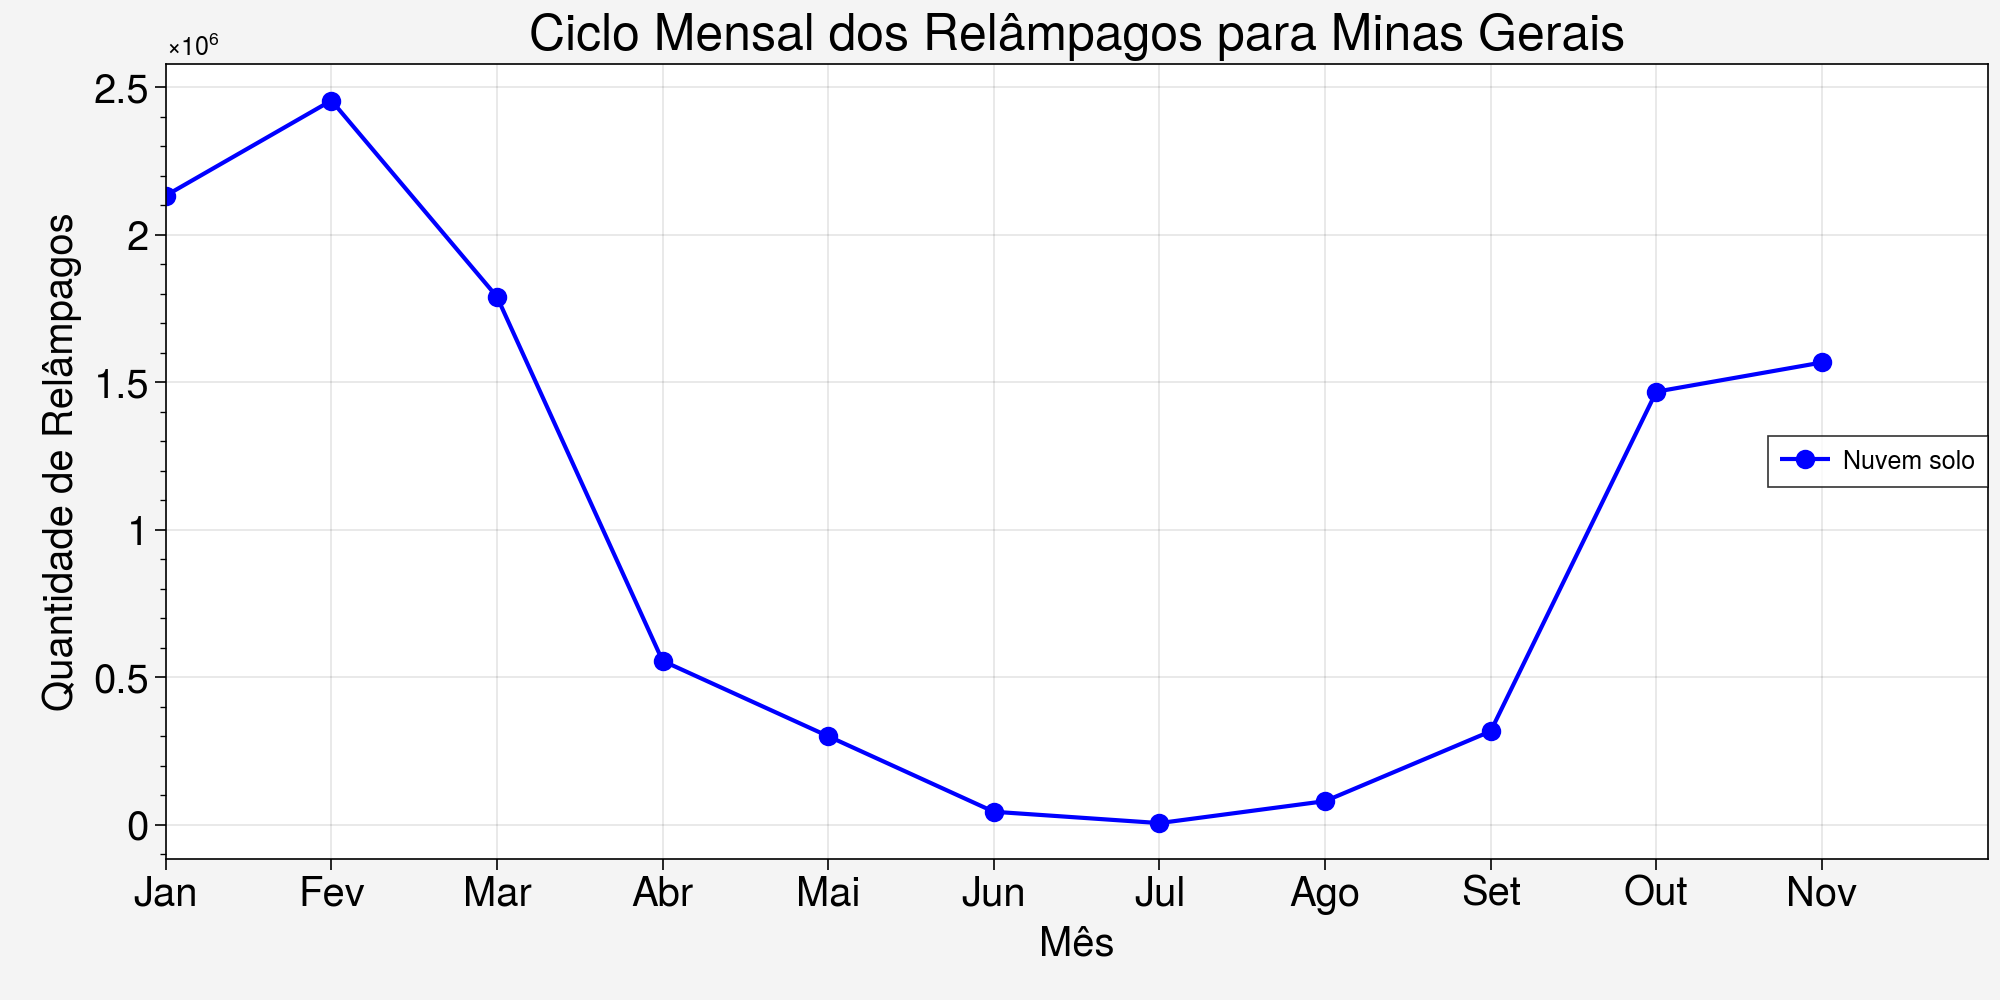

In [9]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de linha
ax.plot(df_mensal.index, df_mensal.contagem, color='blue', marker='o', label='Nuvem solo')

# formatação de eixos etc
ax.format(xlabel='Mês',
          ylabel='Quantidade de Relâmpagos',
          title='Ciclo Mensal dos Relâmpagos para Minas Gerais',
          small='20px', large='25px',
          xticks=df_mensal.index,
          xlim=(1, 12),
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          grid=True,
          )

# adiciona a legenda
ax.legend()

# salva figura
#fig.save(f'{dir}/output/Fig_1_diurno_ic.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

In [10]:
df_mensal_pos = df_pos.groupby([df_pos.index.month]).count()
df_mensal_pos = df_mensal_pos[['pc']].rename(columns={'pc': 'contagem'})


df_mensal_neg = df_neg.groupby([df_neg.index.month]).count()
df_mensal_neg = df_mensal_neg[['pc']].rename(columns={'pc': 'contagem'})

C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\2044958172.py:9: UltraPlotWarning: The rc setting 'small' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.smallsize' instead.
  ax.format(xlabel='Mês', ylabel='Quantidade de relâmpagos',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\2044958172.py:9: UltraPlotWarning: The rc setting 'large' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.largesize' instead.
  ax.format(xlabel='Mês', ylabel='Quantidade de relâmpagos',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\2044958172.py:9: UltraPlotWarning: The rc setting 'small' was deprecated in version 0.6.0 and may be removed in the next major release (version 2.0.0). Please use 'font.smallsize' instead.
  ax.format(xlabel='Mês', ylabel='Quantidade de relâmpagos',
C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\2044958172.py:9: UltraPlotWarning: The rc setting 

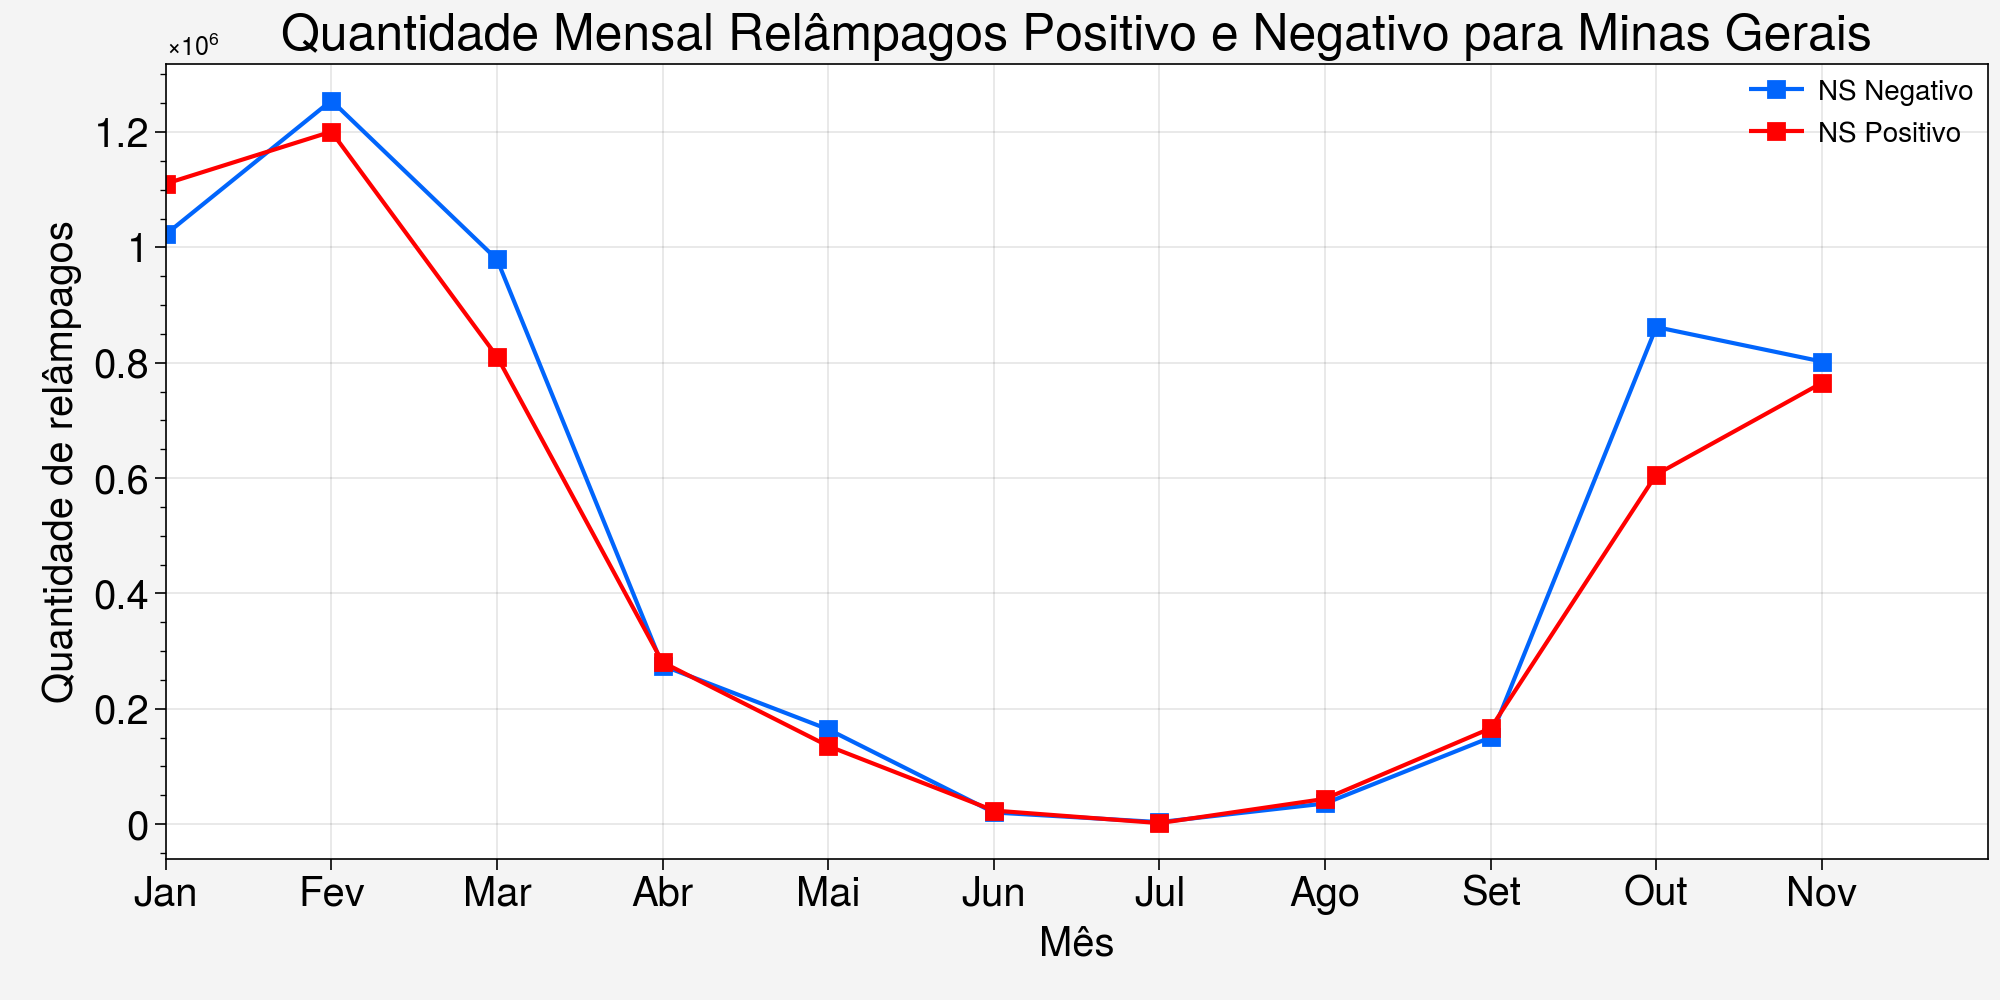

In [11]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de linha
ax.plot(df_mensal_neg.index,df_mensal_neg.contagem , color='bright blue', marker='s', label='NS Negativo')
ax.plot(df_mensal_pos.index,df_mensal_pos.contagem , color = 'red', marker='s', label='NS Positivo')

# formatação de eixos etc
ax.format(xlabel='Mês', ylabel='Quantidade de relâmpagos',
          title='Quantidade Mensal Relâmpagos Positivo e Negativo para Minas Gerais',
          xticks=df_mensal_pos.index,
          xlim=(1, 12),
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          small='20px', large='25px')

# adiciona a legenda
ax.legend(frameon=False, ncols=1, loc='ur', prop={'size': 10})

# salva figura
#fig.save(f'{dir}/output/Fig_2_diurno_todostipos.jpg', dpi=300, bbox_inches='tight')

# exibe na tela
uplt.show()

C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\1485146633.py:53: UltraPlotWarning: fig.tight_layout() has no effect on ultraplot figures. ultraplot uses its own tight layout algorithm that is activated by default. To disable it, set uplt.rc['subplots.tight'] to False or pass tight=False to uplt.subplots(). For details, see fig.auto_layout().
  fig.tight_layout()


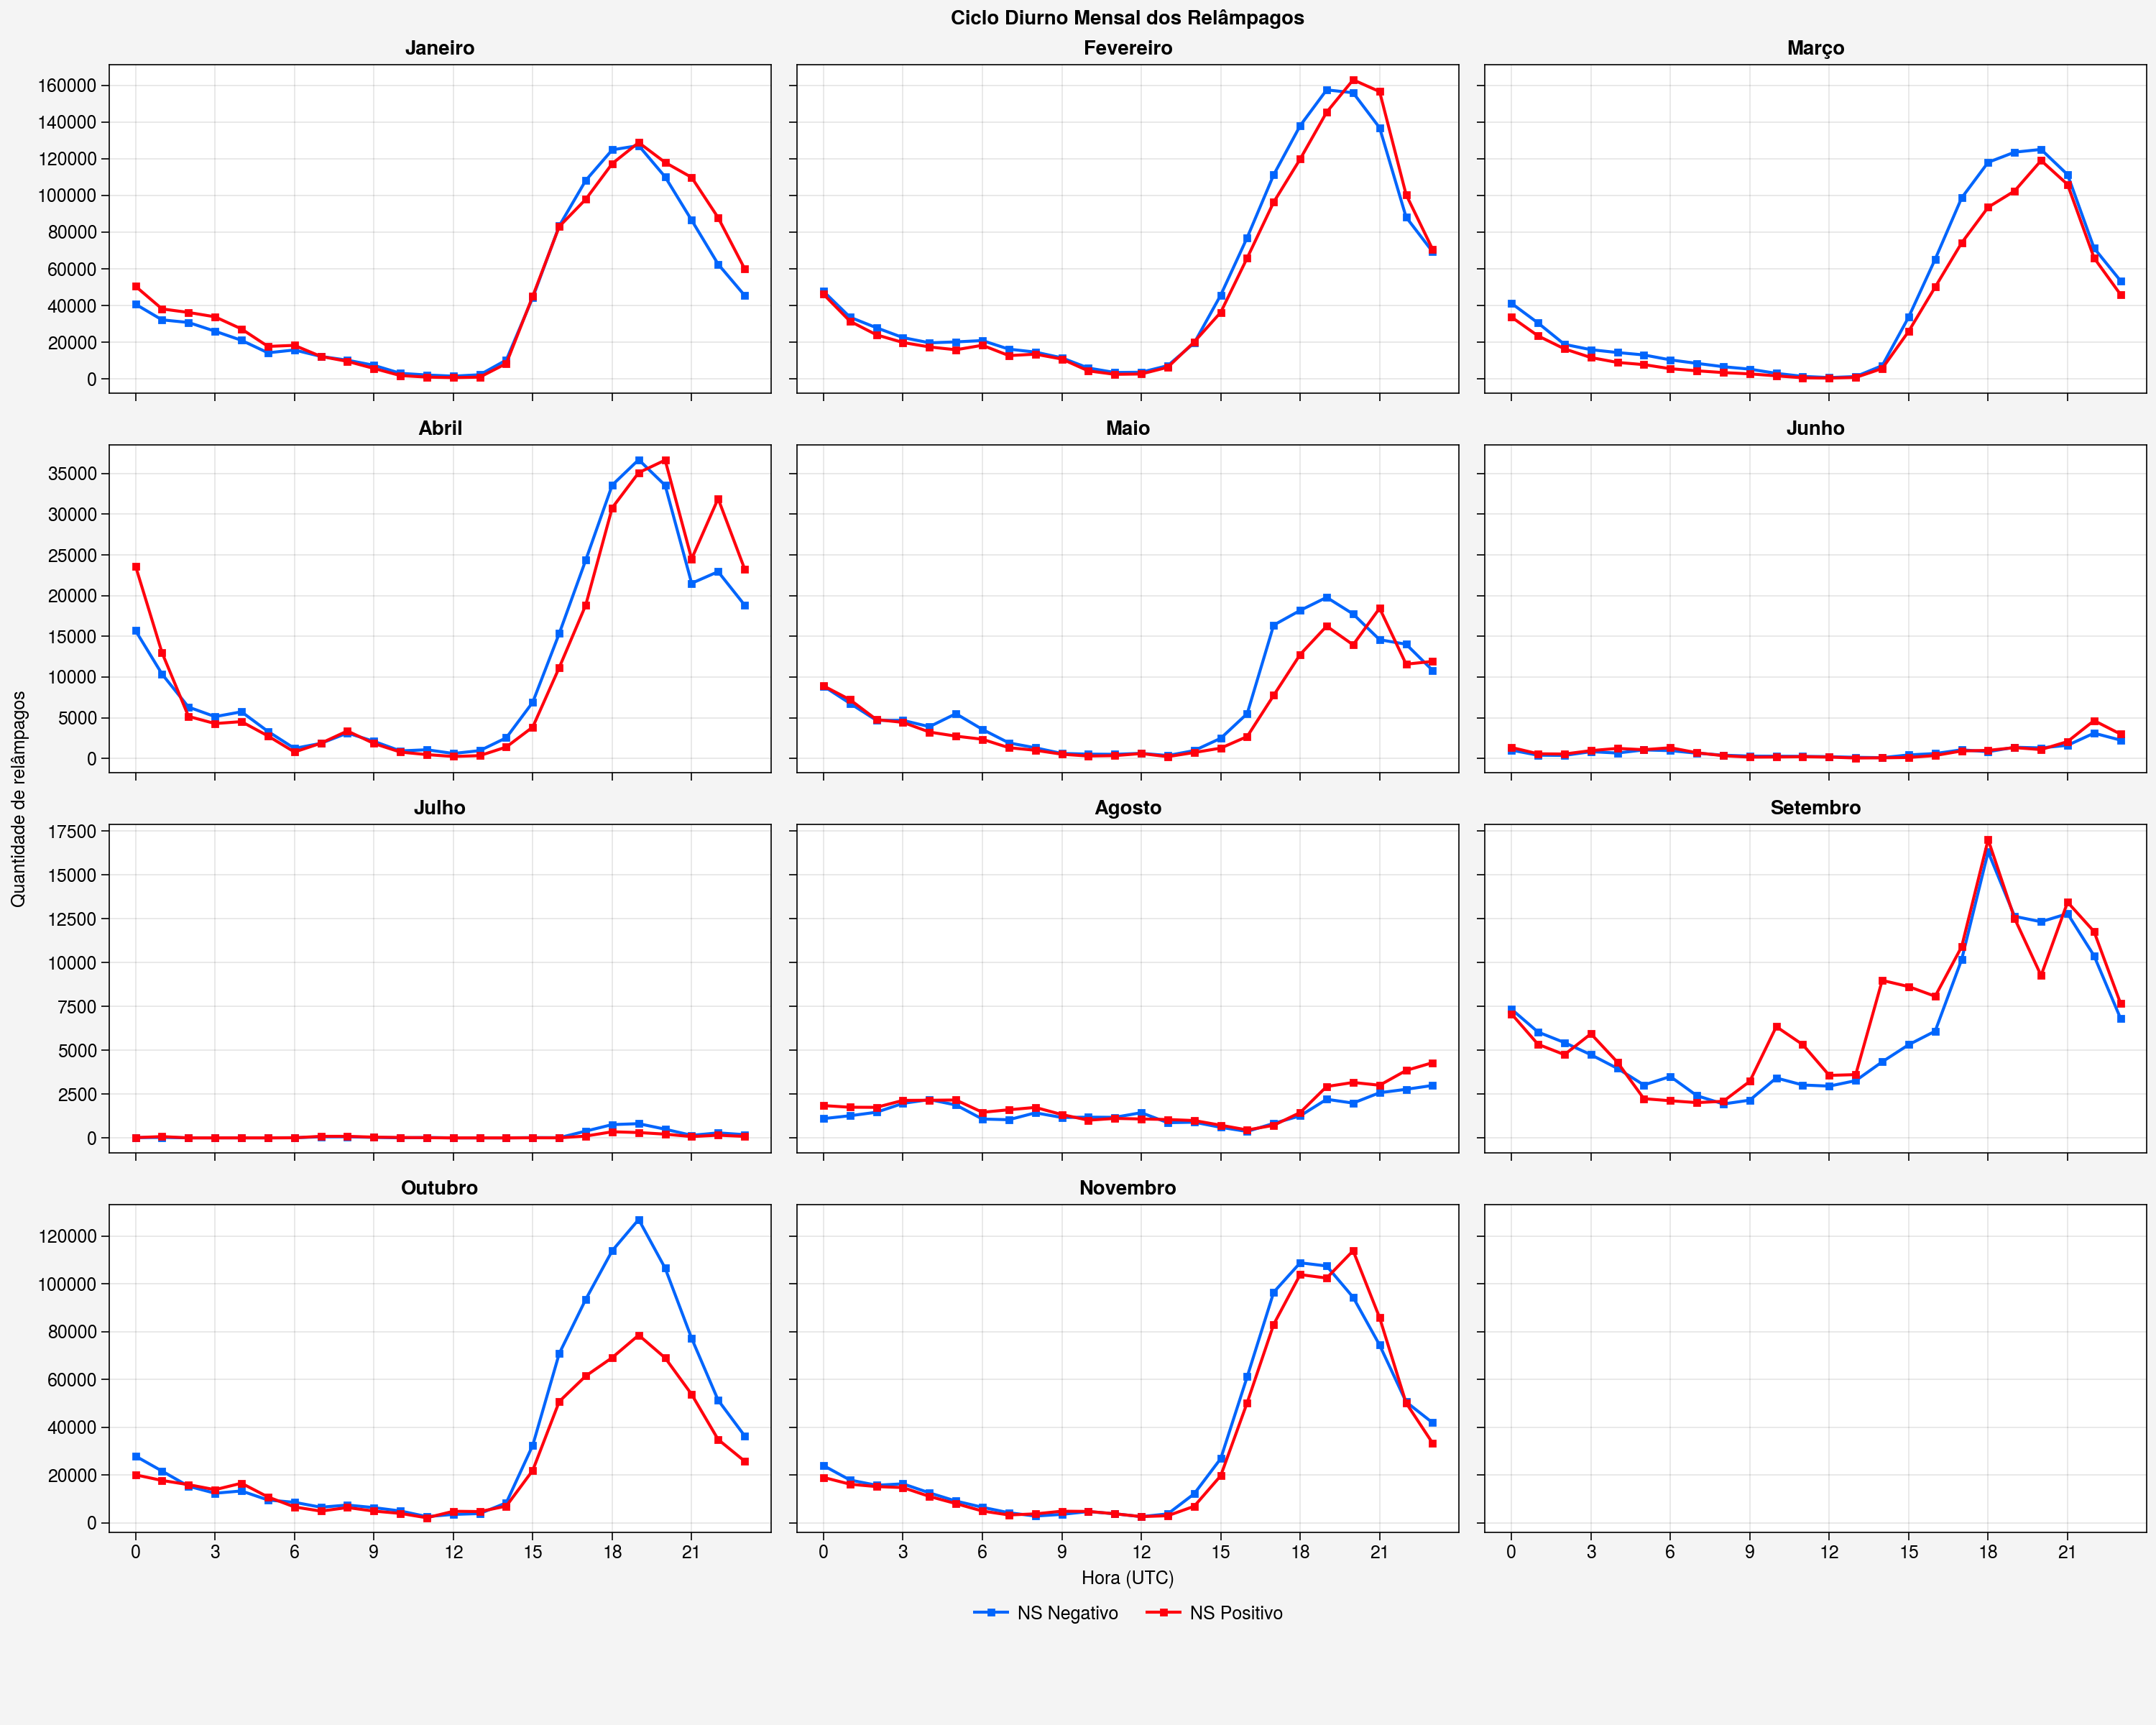

In [17]:
fig, axs = uplt.subplots(nrows=4, ncols=3, figsize=(15, 12), sharex=True, sharey=True)

nomes_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# 2. Faz um loop pelos meses de 1 a 12
for i, mes in enumerate(range(1, 12)):
    # Seleciona o eixo (subplot) correto na grade
    ax = axs[i]

    # Filtra os dados para o mês atual
    df_mes_pos = df_pos[df_pos.index.month == mes]
    df_mes_neg = df_neg[df_neg.index.month == mes]

    # Agrupa por hora e conta as ocorrências (igual ao seu código original)
    df_hora_pos = df_mes_pos.groupby([df_mes_pos.index.hour]).count()
    df_hora_pos = df_hora_pos[['pc']].rename(columns={'pc': 'contagem'})

    df_hora_neg = df_mes_neg.groupby([df_mes_neg.index.hour]).count()
    df_hora_neg = df_hora_neg[['pc']].rename(columns={'pc': 'contagem'})
    
    # Se um mês não tiver dados para todas as horas, preenchemos com 0 para evitar erros
    horas_todas = pd.DataFrame(index=range(24))
    df_hora_pos = horas_todas.join(df_hora_pos).fillna(0)
    df_hora_neg = horas_todas.join(df_hora_neg).fillna(0)

    # 3. Plota os dados no eixo (ax) do mês atual
    # Usamos .values para garantir que estamos plotando apenas os números
    plot_neg = ax.plot(df_hora_neg.index, df_hora_neg.values, color='bright blue', marker='s', markersize=3, label='NS Negativo')
    plot_pos = ax.plot(df_hora_pos.index, df_hora_pos.values, color='bright red', marker='s', markersize=3, label='NS Positivo')

    # Adiciona o nome do mês como título de cada subplot
    ax.format(title=nomes_meses[mes], titleweight='bold')

# 4. Formatação geral da figura
axs.format(
    suptitle='Ciclo Diurno Mensal dos Relâmpagos', # Título geral
    xlabel='Hora (UTC)',
    ylabel='Quantidade de relâmpagos',
    xlim=(-1, 24),
    xticks=range(0, 24, 3), # Marcas de eixo X a cada 3 horas para não poluir
    xtickminor=False,
    ytickminor=False
)

# 5. Adiciona uma única legenda para a figura inteira
fig.legend([plot_neg, plot_pos], loc='b', frameon=False, ncols=2) # 'b' = bottom

# Ajusta o layout para evitar sobreposição de títulos e eixos
fig.tight_layout()

# 6. Exibe a composição na tela
uplt.show()

In [12]:
df_hora = df.groupby([df.index.hour]).count()
df_hora = df_hora[['pc']].rename(columns={'pc': 'contagem'})

df_hora_pos = df_pos.groupby([df_pos.index.hour]).count()
df_hora_pos = df_hora_pos[['pc']].rename(columns={'pc': 'contagem'})

df_hora_neg = df_neg.groupby([df_neg.index.hour]).count()
df_hora_neg = df_hora_neg[['pc']].rename(columns={'pc': 'contagem'})


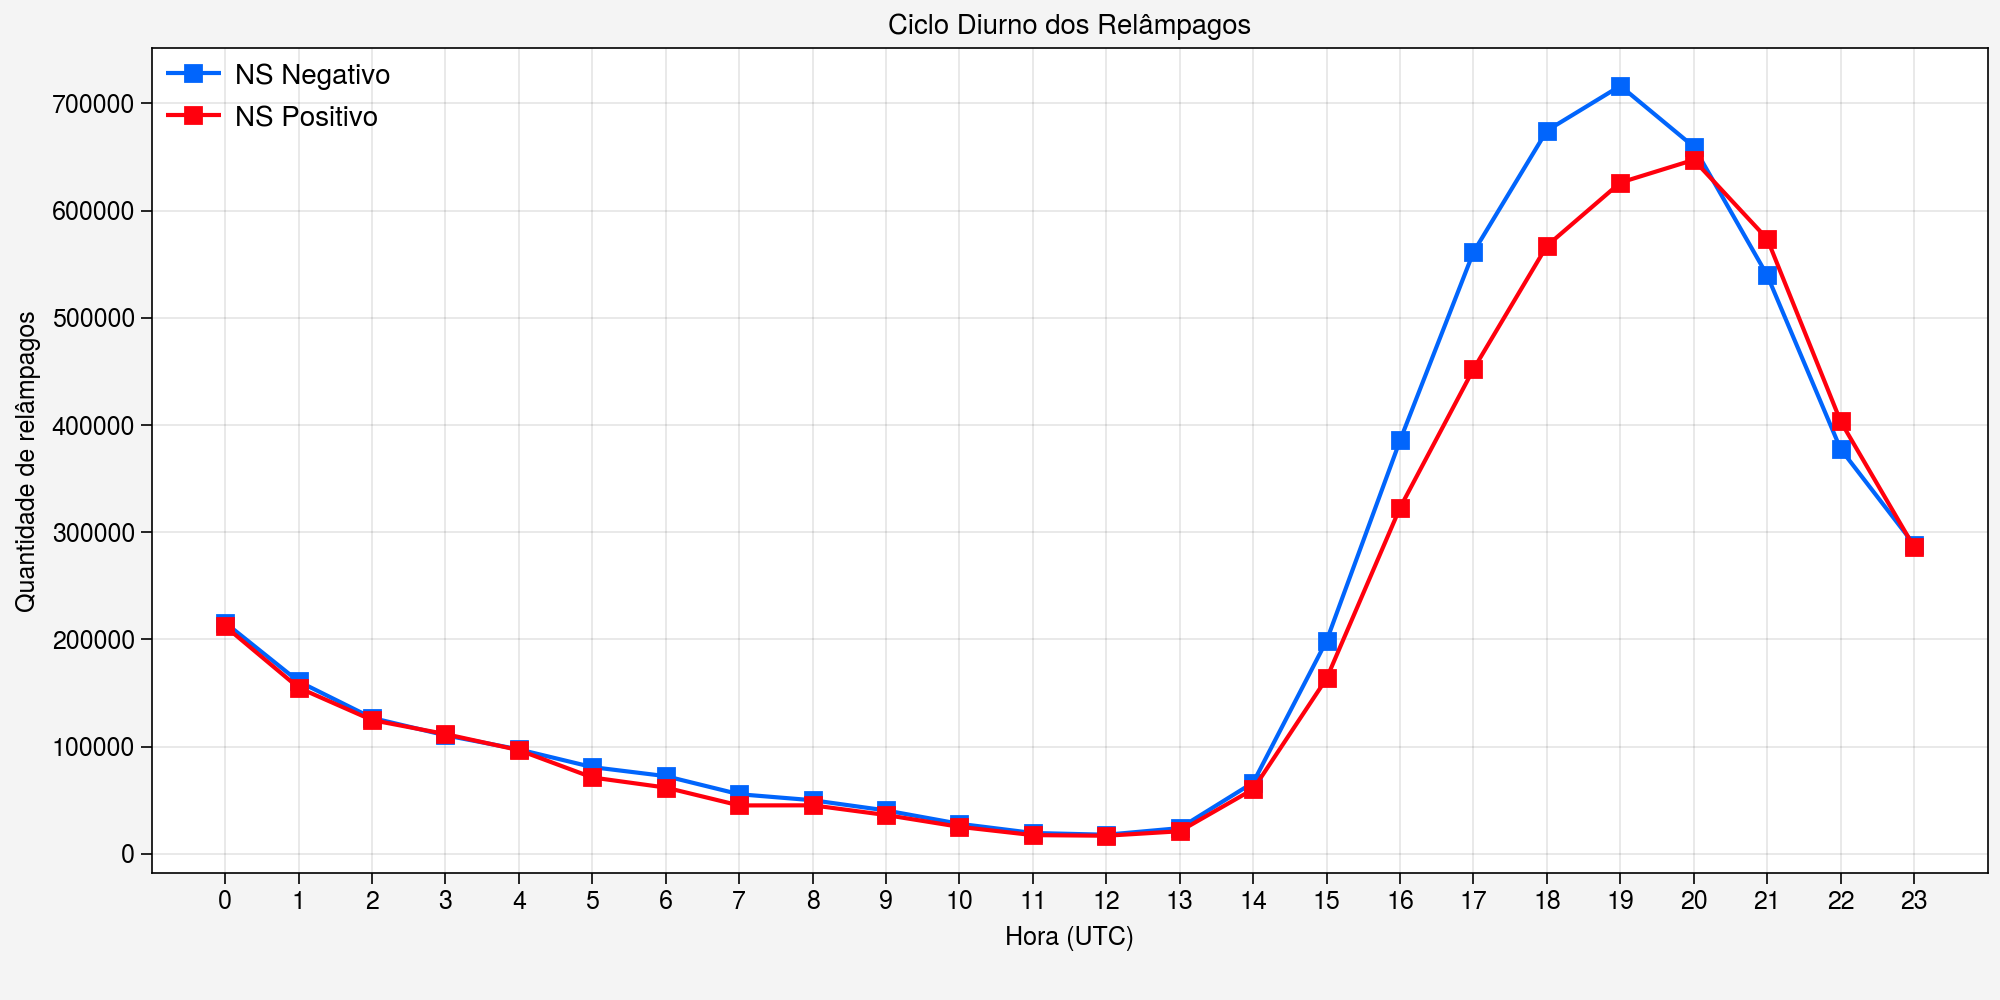

In [13]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de linha
ax.plot(df_hora.index, df_hora_neg, color='bright blue', marker='s', label='NS Negativo')
ax.plot(df_hora.index, df_hora_pos, color='bright red', marker='s', label='NS Positivo')

# formatação de eixos etc
ax.format(xlabel='Hora (UTC)', ylabel='Quantidade de relâmpagos',
          title='Ciclo Diurno dos Relâmpagos',
          xtickminor=False, ytickminor=False,
          xticks=df_hora.index,
          xticklabels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
                       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'],
          xlim=(-1, 24))

# adiciona a legenda
ax.legend(frameon=False, ncols=1, loc='ul', prop={'size': 10})

# exibe na tela
uplt.show()

In [19]:

pccgneg_horario = df_neg.groupby([df_neg.index.month])['pc'].mean()
pccgpos_horario = df_pos.groupby([df_pos.index.month])['pc'].mean()


y_pccgneg = abs(pccgneg_horario.values)
y_pccgpos = abs(pccgpos_horario.values)

pccgpos_horario

data
1     6.883670
2     7.594640
3     8.000023
4     7.252652
5     6.992304
6     6.230500
7     9.822971
8     8.426149
9     6.833088
10    6.336894
11    6.304161
Name: pc, dtype: float64

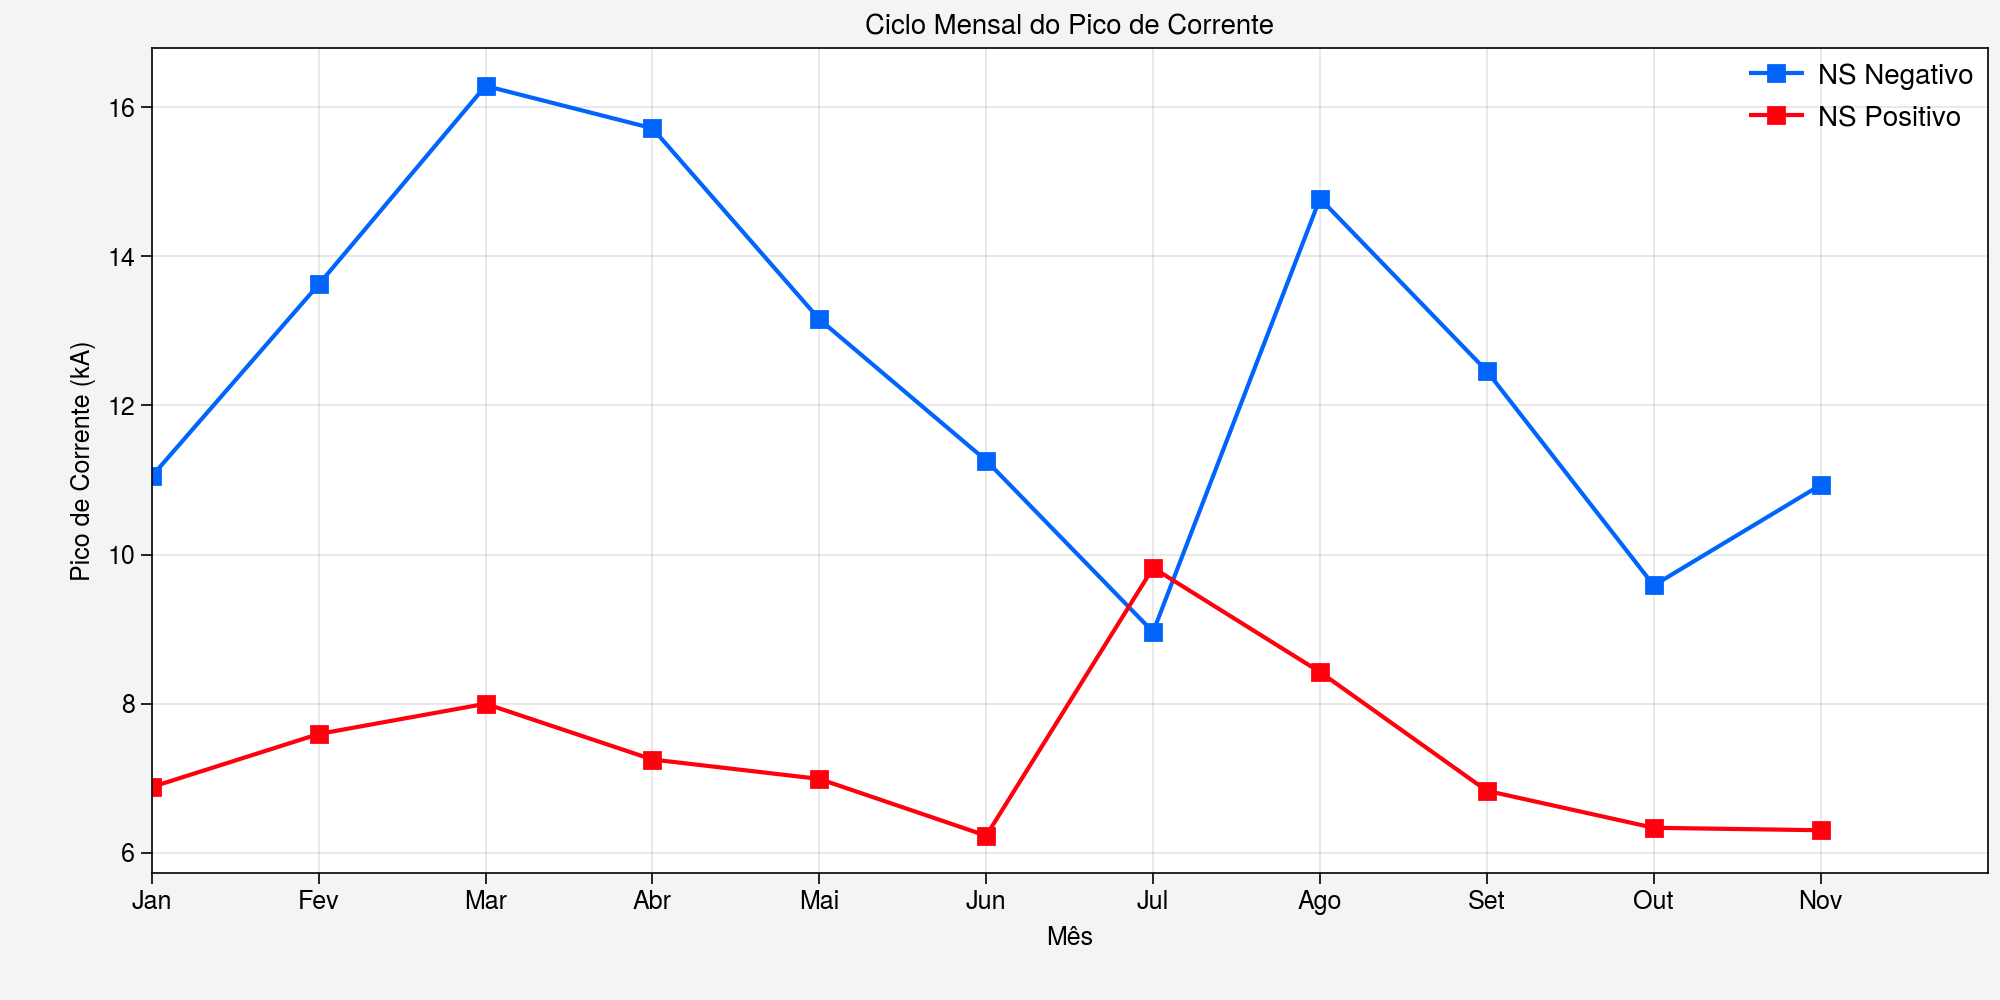

In [20]:
# cria a moldura da figura
fig, ax = uplt.subplots(figsize=(10, 5), tight=True)

# plota gráfico de linha
ax.plot(pccgneg_horario.index, y_pccgneg, color='bright blue', marker='s', label='NS Negativo')
ax.plot(pccgpos_horario.index, y_pccgpos, color='bright red', marker='s', label='NS Positivo')

# formatação de eixos etc
ax.format(xlabel='Mês', ylabel='Pico de Corrente (kA)', title='Ciclo Mensal do Pico de Corrente',
         xtickminor=False, ytickminor=False,
          xticks=pccgpos_horario.index,
          xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'],
          xlim=(1, 12))

# adiciona a legenda
ax.legend(frameon=False, ncols=1,  prop={'size': 10})


# exibe na tela
uplt.show()
      

C:\Users\xloko\AppData\Local\Temp\ipykernel_24512\3522056243.py:52: UltraPlotWarning: fig.tight_layout() has no effect on ultraplot figures. ultraplot uses its own tight layout algorithm that is activated by default. To disable it, set uplt.rc['subplots.tight'] to False or pass tight=False to uplt.subplots(). For details, see fig.auto_layout().
  fig.tight_layout()


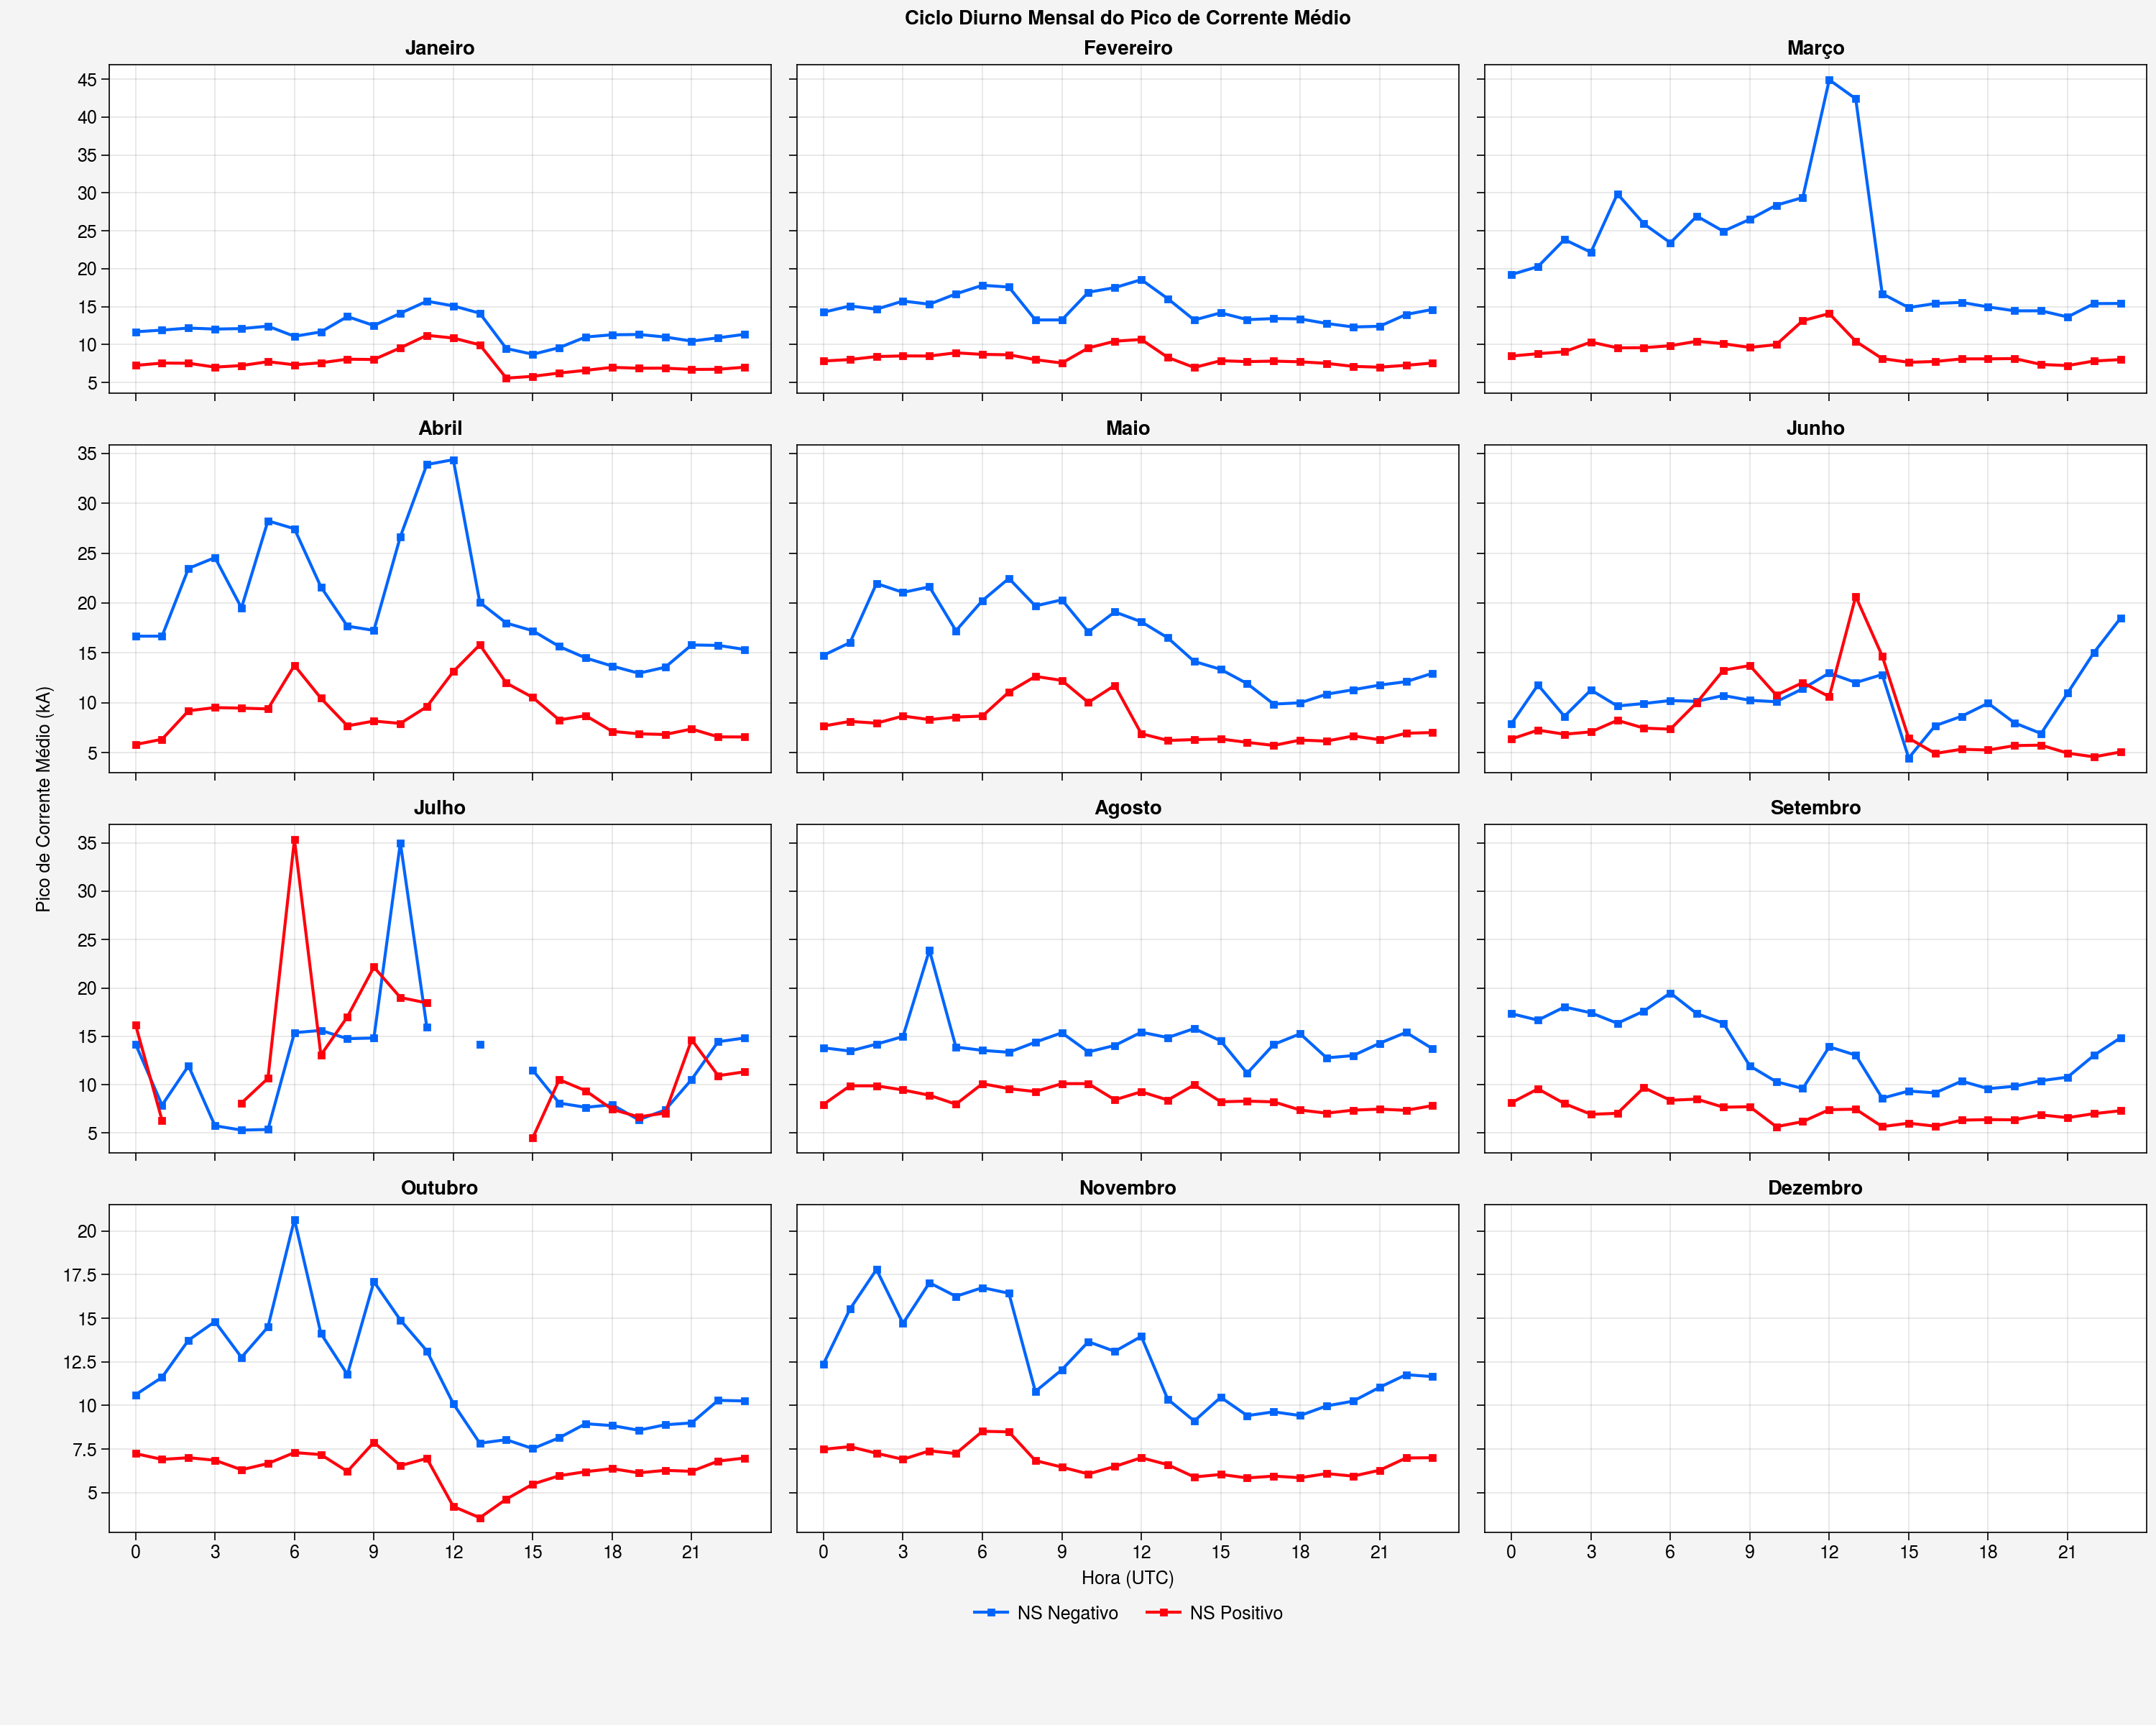

In [21]:
# Mapeia o número do mês para o nome em português
nomes_meses = {
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril',
    5: 'Maio', 6: 'Junho', 7: 'Julho', 8: 'Agosto',
    9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
}

# 1. Cria a moldura da figura com uma grade de 4x3 para os 12 meses.
fig, axs = uplt.subplots(nrows=4, ncols=3, figsize=(15, 12), sharex=True, sharey=True)

# 2. Faz um loop pelos meses de 1 a 12
for i, mes in enumerate(range(1, 13)):
    # Seleciona o eixo (subplot) correto na grade
    ax = axs[i]

    # Filtra os dados para o mês atual
    df_mes_pos = df_pos[df_pos.index.month == mes]
    df_mes_neg = df_neg[df_neg.index.month == mes]

    # Para cada mês, agrupa por HORA e calcula a MÉDIA do pico de corrente
    pccg_diurno_neg = df_mes_neg.groupby([df_mes_neg.index.hour])['pc'].mean()
    pccg_diurno_pos = df_mes_pos.groupby([df_mes_pos.index.hour])['pc'].mean()
    
    # Garante que todas as 24 horas sejam representadas, preenchendo com NaN (ou 0) se não houver dados.
    # O .reindex garante que o eixo X terá sempre 24h, de 0 a 23.
    horas_todas = range(24)
    pccg_diurno_neg = pccg_diurno_neg.reindex(horas_todas)
    pccg_diurno_pos = pccg_diurno_pos.reindex(horas_todas)

    # 3. Plota os dados no eixo (ax) do mês atual
    plot_neg = ax.plot(pccg_diurno_neg.index, abs(pccg_diurno_neg.values), color='bright blue', marker='s', markersize=3, label='NS Negativo')
    plot_pos = ax.plot(pccg_diurno_pos.index, abs(pccg_diurno_pos.values), color='bright red', marker='s', markersize=3, label='NS Positivo')

    # Adiciona o nome do mês como título de cada subplot
    ax.format(title=nomes_meses[mes], titleweight='bold')

# 4. Formatação geral da figura
axs.format(
    suptitle='Ciclo Diurno Mensal do Pico de Corrente Médio', # Título geral
    xlabel='Hora (UTC)',
    ylabel='Pico de Corrente Médio (kA)',
    xlim=(-1, 24),
    xticks=range(0, 24, 3), # Marcas de eixo X a cada 3 horas
    xtickminor=False,
    ytickminor=False
)

# 5. Adiciona uma única legenda para a figura inteira
fig.legend([plot_neg, plot_pos], loc='b', frameon=False, ncols=2)

# Ajusta o layout para evitar sobreposição
fig.tight_layout()

# 6. Exibe a composição na tela
uplt.show()

In [1]:
import numpy as np                          # Biblioteca para trabalhar com matrizes 
import pandas as pd                         # Biblioteca para trabalhar com tabelas (parecidas com tabelas em excel)
import ultraplot as uplt                # Biblioteca para plotar gráficos
import os                                   # Biblioteca para acessar o sistema operacional 
import cartopy.crs as ccrs                  # Biblioteca para trabalhar com projeções de mapas 
import cartopy.io.shapereader as shpreader  # Biblioteca para ler arquivos shapefiles 
import tarfile                              # Biblioteca para destargear um arquivo 
from tqdm.notebook import tqdm_notebook     # Biblioteca que cira barra de progresso
import salem                                # Biblioteca para mascarar regiões
import xarray as xr                         # Biblioteca para para ler/criar arquivos netcdf
import glob                                 # Biblioteca para para listar arquivos
import calendar                             # Biblioteca para calendário
import shutil

# vamos ignorar vários avisos
import warnings
warnings.filterwarnings('ignore')

In [2]:
def index(longitudes_matriz, latitudes_matriz, lon_raio, lat_raio):

    ''' Função para calcular o índice (i e j) do pixel de uma matriz que o relâmpago pertence
    
    Parâmetros:
               longitudes_matriz (array): array de uma dimensão das longitudes da matriz em graus 
               latitudes_matriz (array): array de uma dimensão das latitudes da matriz em graus 
               lon_raio (float): valor da longitude do relâmpago em graus 
               lat_raio (float): valor da latitude do relâmpago em graus 

    Retorna:
            indice_lat_raio (float): índice da latitude (ou seja, da linha) do pixel da matriz que o relâmpago pertence
            indice_lon_raio (float): índice da longitude (ou seja, da linha) do pixel da matriz que o relâmpago pertence        
    '''

    # calcula a diferença entre as lats/lons da matriz e a latitude/longitude do relâmpago
    distancia_lon = (longitudes_matriz - lon_raio)**2
    distancia_lat = (latitudes_matriz - lat_raio)**2

    # índice da longitude e latitude do relâmpago
    indice_lon_raio = np.nonzero(distancia_lon == np.min(distancia_lon))
    indice_lat_raio = np.nonzero(distancia_lat == np.min(distancia_lat))

    # retorna os valores dos índices calculados
    return indice_lat_raio, indice_lon_raio

In [6]:
# Configuração da grade 
lonmin_mg = -51.3
lonmax_mg = -39.7
latmin_mg = -23.0
latmax_mg = -14.0

# Espaçamento da grade
delta = 0.01   # grade com 1 km de resolução espacial

# Montando a grade
lons = np.arange(lonmin_mg, lonmax_mg, delta)
lats = np.arange(latmax_mg, latmin_mg, -delta)

# Quantidade de pontos para longitude e latitude
nlon = len(lons)
nlat = len(lats)

In [ ]:

# # Leitura do arquivo com o Pandas
# df0 = pd.read_csv('2019/dados_filtrados_MG.csv')

# # Gera matriz de raios
# raios_lon, raios_lat = df0['lon'].values, df0['lat'].values

# # Interpolando para ponto de grade
# raios = np.zeros((nlat, nlon))

# # Loop em cada longitude e latitude da lista
# for lonraio, latraio in zip(raios_lon, raios_lat):

#     # função que extrai a qual pixel aquele relâmpago pertence
#     lin, col = index(lons, lats, lonraio, latraio)

#     # soma os relâmpagos por pixel
#     raios[lin,col]+=1

# # Gera arquivo netcdf
# data_vars = {'raio':(('lat', 'lon'), raios, {'units': 'raios/km²', 'long_name':'Raios em MG'})}
# coords = {'lat': lats, 'lon': lons, 'time': df0['data'].values}
# ds = xr.Dataset(data_vars=data_vars, coords=coords)


In [4]:

# Leitura dos dados
df0 = pd.read_csv('2019/dados_filtrados_MG.csv')
df0['data'] = pd.to_datetime(df0['data'])

# Lista de meses únicos
meses = pd.date_range(start='2019-01-01', end='2019-12-31', freq='MS')

# Inicializa cubo 3D
raios_mensal = np.zeros((len(meses), nlat, nlon))

# Loop sobre cada mês
for i, mes in enumerate(meses):
    inicio = mes
    fim = mes + pd.offsets.MonthEnd(1)

    df_mes = df0[(df0['data'] >= inicio) & (df0['data'] <= fim)]

    # Prepara matriz para o mês
    matriz_mes = np.zeros((nlat, nlon))

    for lonraio, latraio in zip(df_mes['lon'], df_mes['lat']):
        lin, col = index(lons, lats, lonraio, latraio)
        matriz_mes[lin, col] += 1

    raios_mensal[i, :, :] = matriz_mes

# Cria dataset com a dimensão time
ds = xr.Dataset(
    data_vars={
        'raio': (('time', 'lat', 'lon'), raios_mensal, {
            'units': 'raios/mês.km²',
            'long_name': 'Frequência de relâmpagos por mês'
        })
    },
    coords={
        'time': meses,
        'lat': lats,
        'lon': lons
    }
)


KeyboardInterrupt: 

In [6]:
ds.to_netcdf('raios.nc', mode='w', engine='scipy')


In [ ]:
# dados = xr.open_dataset('raios.nc', engine='scipy')

# # Converter a coordenada time para datetime64
# dados['time'] = pd.to_datetime(dados['time'].values)

# # ANUAL
# anual = dados.resample(time='1Y').sum()

# # MENSAL
# mensal = dados.resample(time='1M').sum() 

In [7]:

# Abrir o dataset
dados = xr.open_dataset('raios.nc', engine='scipy')

# Converter a coordenada 'time' para datetime64
dados['time'] = pd.to_datetime(dados['time'].values)

# Ordenar pelo tempo
dados = dados.sortby('time')

# Resample anual
anual = dados.resample(time='1Y').sum()

# Resample mensal
mensal = dados.resample(time='1M').sum()


Overwriting 'balance' that was already registered


In [8]:
dados

<xarray.Dataset> Size: 100MB
Dimensions:  (lon: 1160, lat: 900, time: 12)
Coordinates:
  * lon      (lon) float64 9kB -51.3 -51.29 -51.28 ... -39.73 -39.72 -39.71
  * lat      (lat) float64 7kB -14.0 -14.01 -14.02 ... -22.97 -22.98 -22.99
  * time     (time) datetime64[ns] 96B 2019-01-01 2019-02-01 ... 2019-12-01
Data variables:
    raio     (time, lat, lon) float64 100MB ...

In [ ]:
# # Abrir o dataset
# dados = xr.open_dataset('raios.nc', engine='scipy')

# # Converter a coordenada time para datetime64
# dados['time'] = pd.to_datetime(dados['time'].values)

# # Agora o groupby funcionará
# anual = dados.groupby('time.year').sum('time')
# mensal = dados.groupby('time.month').sum('time')

In [9]:
shp = salem.read_shapefile('shp/MG_UF_2019.shp')
shp_estado = shp.loc[shp['SIGLA_UF'] == 'MG']

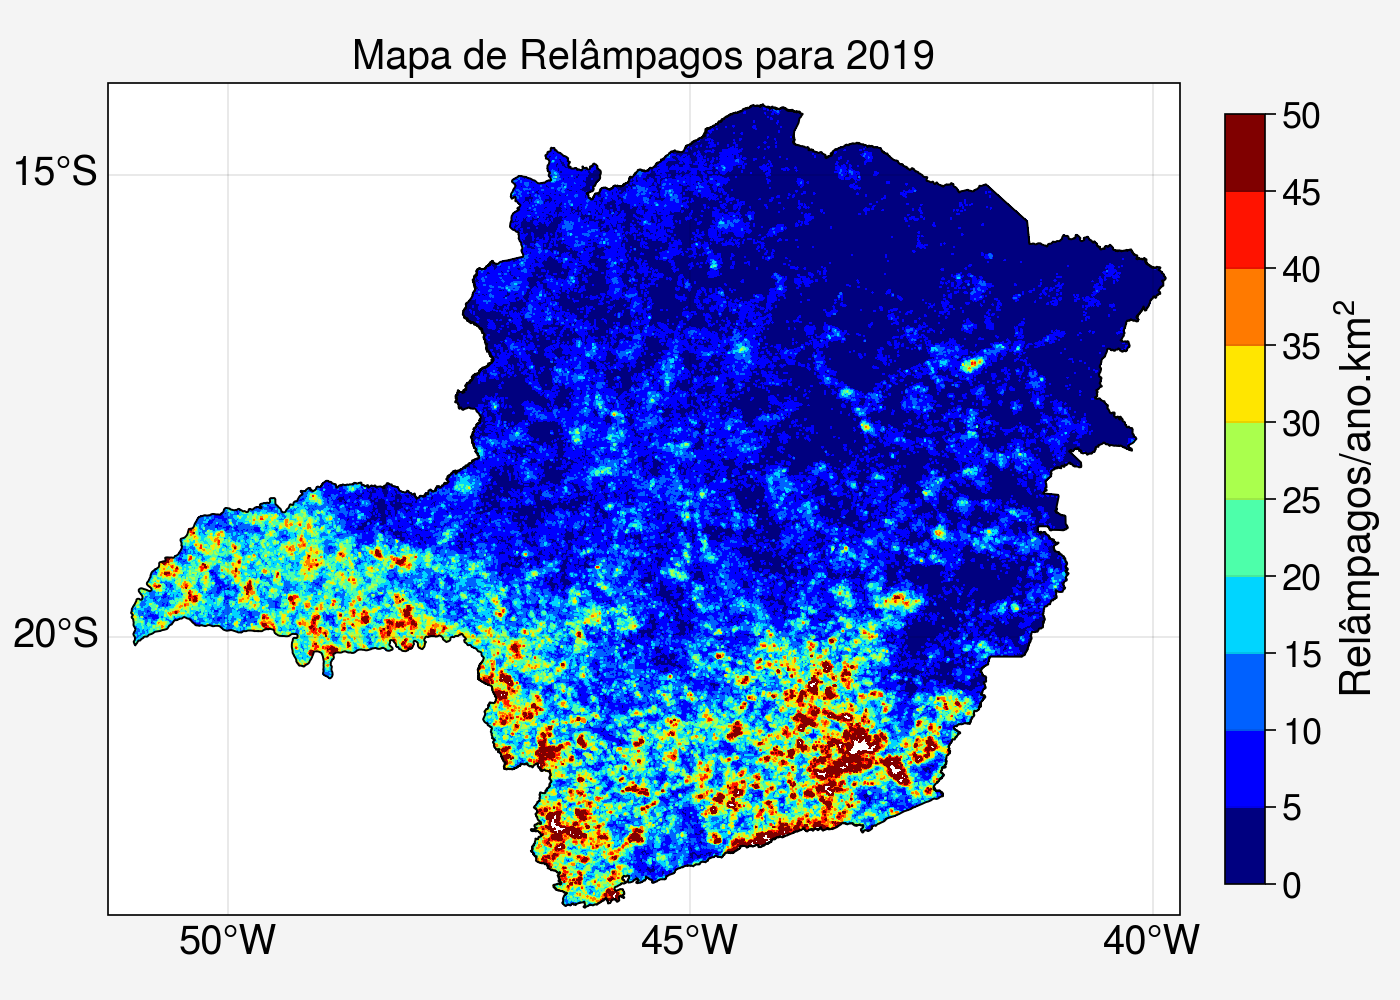

In [10]:
# moldura da figura
fig, ax = uplt.subplots(figsize=(7,5), tight=True, proj='pcarree')

# fomatação dos eixos da figura
ax.format(coast=False, borders=False, innerborders=False, 
          labels=True, latlines=5, lonlines=5, 
          latlim=(latmin_mg, latmax_mg), lonlim=(lonmin_mg, lonmax_mg), 
          title=f'Mapa de Relâmpagos para 2019',
          small='20px', large='20px')

# plota figura
map1 = ax.contourf(anual['lon'], 
                   anual['lat'], 
                   anual['raio'][0,:,:].salem.roi(shape=shp_estado), 
                   cmap='jet',
                   vmax=50) 

# Adiciona shapeFile de MG
shapefile=list(shpreader.Reader('shp/MG_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.7)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Relâmpagos/ano.km$^{2}$', length=0.87, ticklabelsize=13, labelsize=15)



# Exibe na tela
uplt.show()

Processando o mês: .... 0
Processando o mês: .... 1
Processando o mês: .... 2
Processando o mês: .... 3
Processando o mês: .... 4
Processando o mês: .... 5
Processando o mês: .... 6
Processando o mês: .... 7
Processando o mês: .... 8
Processando o mês: .... 9
Processando o mês: .... 10


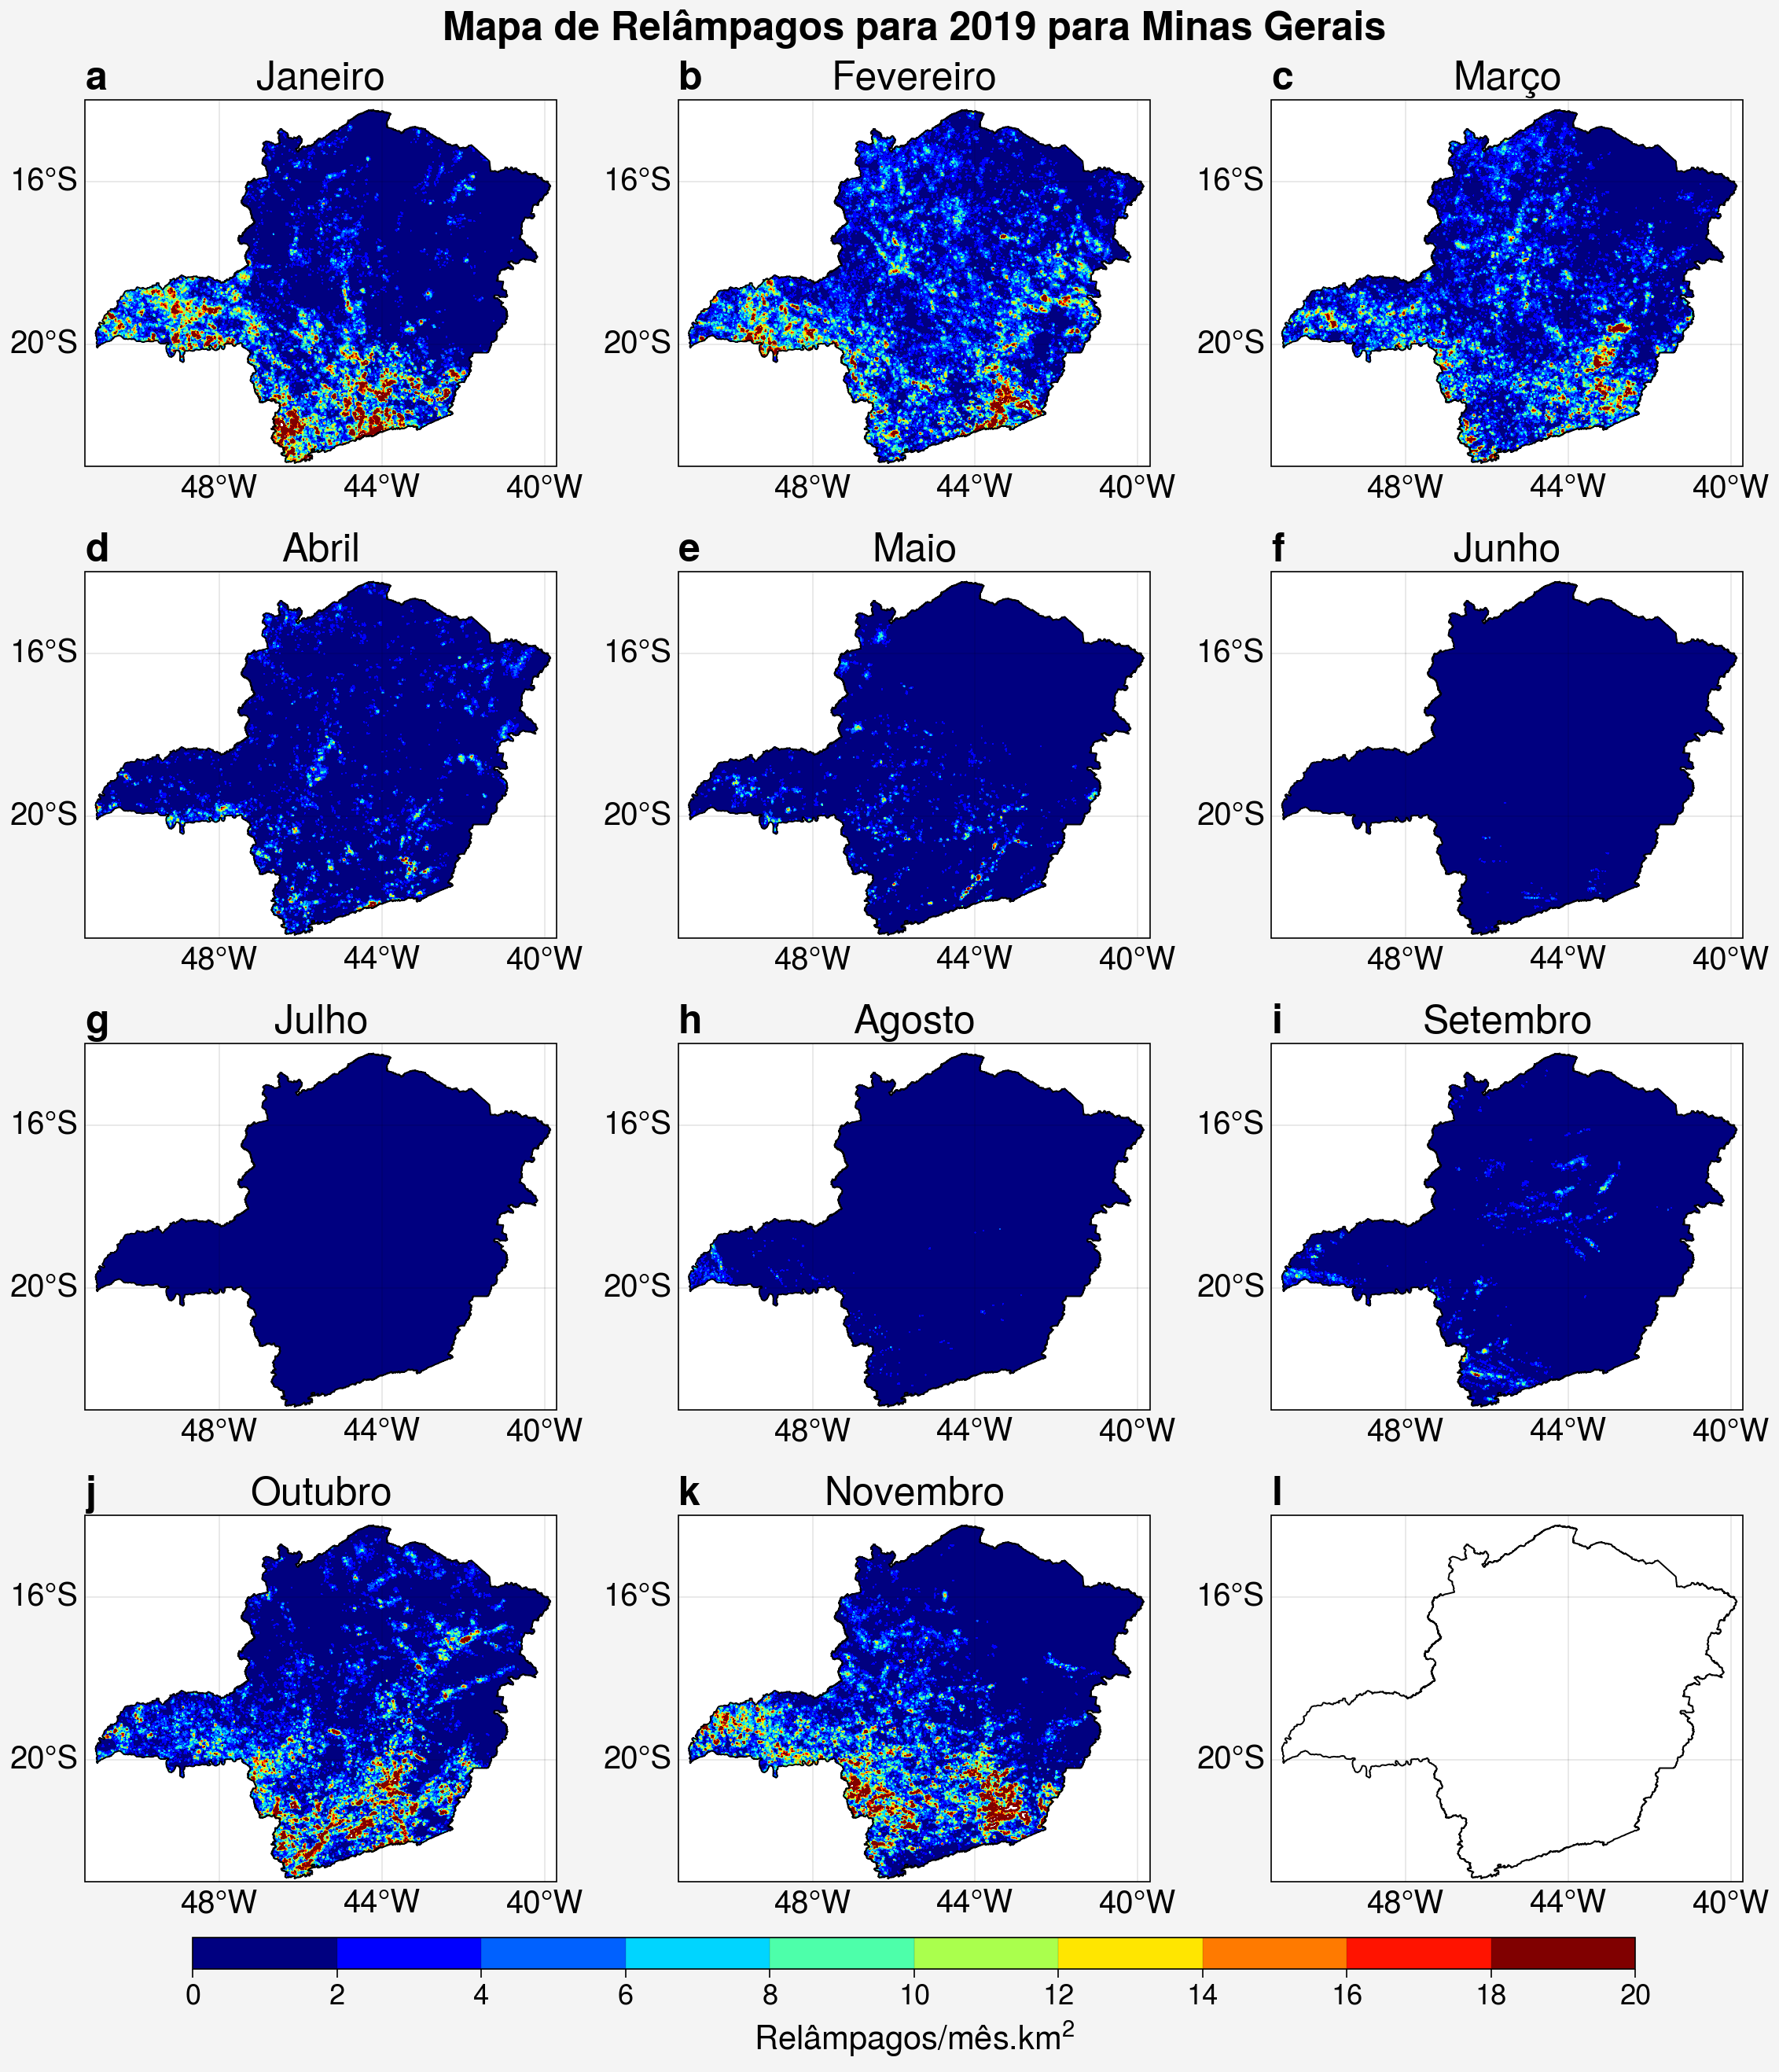

In [ ]:


# cria a moldura da figura   
fig, ax = uplt.subplots(axwidth=3, axheight=3, ncols=3, nrows=4, tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=4, lonlines=4,
          latlim=(latmin_mg, latmax_mg), lonlim=(lonmin_mg, lonmax_mg),
          suptitle=f'Mapa de Relâmpagos para 2019 para Minas Gerais', 
          small='20px', large='25px',
          abc=True)

# Adiciona shapeFile de MG
shapefile=list(shpreader.Reader('shp/MG_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=0.7)


for imes in range(0, 11):

  print(f'Processando o mês: .... {imes}') 

  # aplica mascara recortando o Estado de MG no arquivo   
  xr_shp = mensal['raio'][imes,:,:].salem.roi(shape=shp_estado) 

  # plota figura 
  map1 = ax[imes].contourf(mensal['lon'], mensal['lat'], xr_shp, cmap='jet', vmax=20)
  
  meses = ['janeiro', 'fevereiro', 'março', 'abril', 'maio', 'junho', 'julho', 'agosto', 'setembro', 'outubro', 'novembro', 'dezembro']
    
  # plota titulo de cada figura
  ax[imes].format(title=meses[imes].capitalize())

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Relâmpagos/mês.km$^{2}$', length=0.87, ticklabelsize=13, labelsize=15)

# salva figura

# Exibe na tela
uplt.show()